#### 데이터프레임

# ML

## ML_Classifier

### 라이브러리 불러오기

In [1]:
# from sklearn.datasets import load_데이터 이름
from sklearn.datasets import load_digits
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets, metrics

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models

from sklearn.metrics import classification_report,confusion_matrix

### 데이터 불러오기

In [2]:
df = pd.read_csv("C:/Users/yoojm/Gachon/2학년 1학기/인공지능개론_이명규/Dataset/breast_cancer.csv", index_col=0)

### 데이터 확인

In [3]:
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


### 컬럼명 확인

In [4]:
df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'label'],
      dtype='object')

### 레이블 갯수 확인 (그래프)
label을 뜻하는 컬럼명은 데이터마다 다르기에 판단 필요

Text(0.5, 1.0, 'Label')

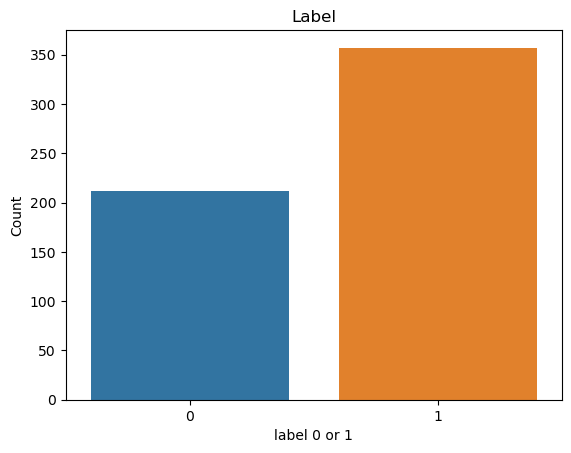

In [5]:
sns.countplot(data = df, x="label")
plt.xlabel("label 0 or 1")
plt.ylabel("Count")
plt.title("Label")

### 레이블 갯수 확인 (숫자)

In [6]:
df['label'].value_counts()

label
1    357
0    212
Name: count, dtype: int64

### 결측치 확인

In [7]:
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
label                      0
dtype: int64

### 결측치 제거

In [8]:
df = df.dropna()
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
label                      0
dtype: int64

### 컬럼별 히스토그램 확인
컬럼 중 의미있는 값을 가질 것 같은 컬럼을 선택

<Axes: xlabel='mean texture', ylabel='Density'>

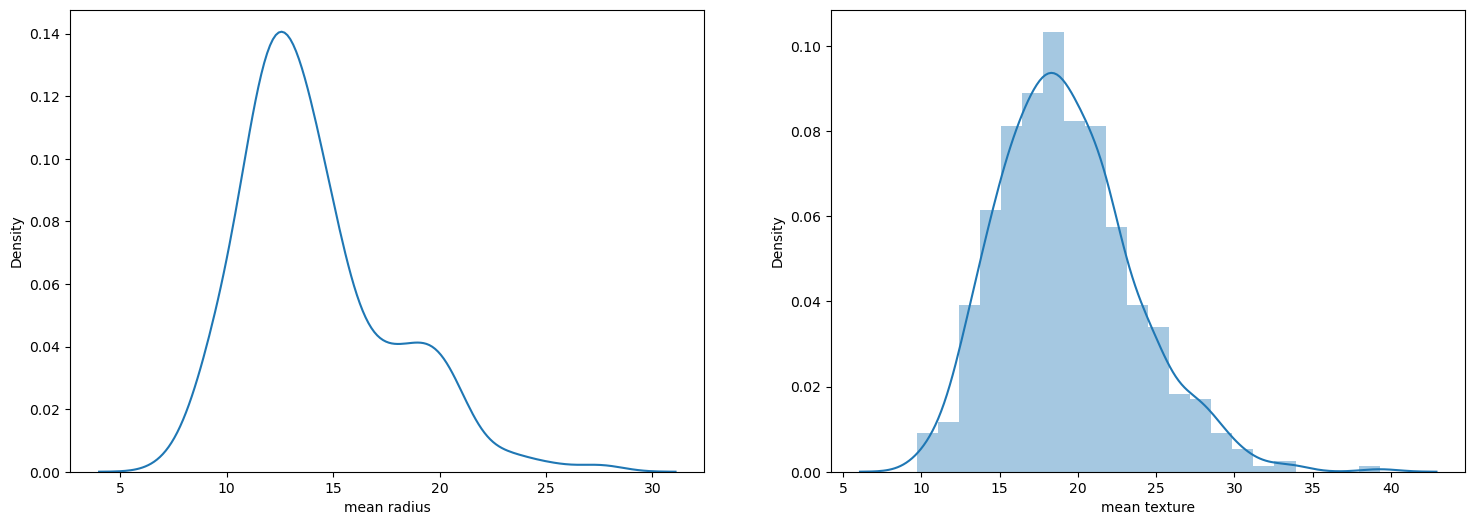

In [9]:
figure = plt.figure(figsize=(18,6))
ax1 = plt.subplot(1,2,1)
sns.distplot(df['mean radius'], kde = True, hist = False, ax=ax1)
ax2 = plt.subplot(1,2,2)
sns.distplot(df['mean texture'], ax=ax2)

### 산점도 확인

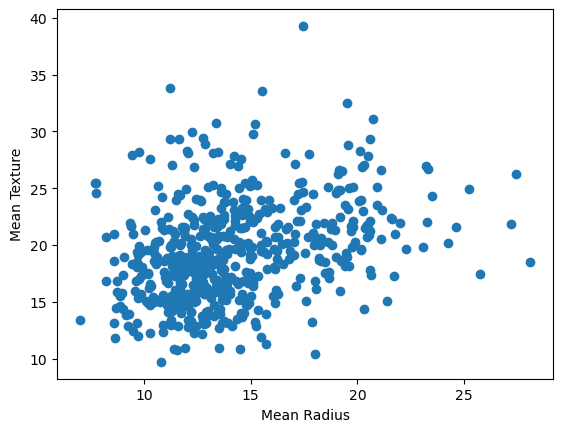

In [10]:
plt.scatter(df['mean radius'], df['mean texture'])
plt.xlabel('Mean Radius')
plt.ylabel('Mean Texture')

plt.show()

### pairplot을 사용해 각 상관관계 살펴보기
vars에는 컬럼명이 들어가고, hue에는 레이블이 들어간다.

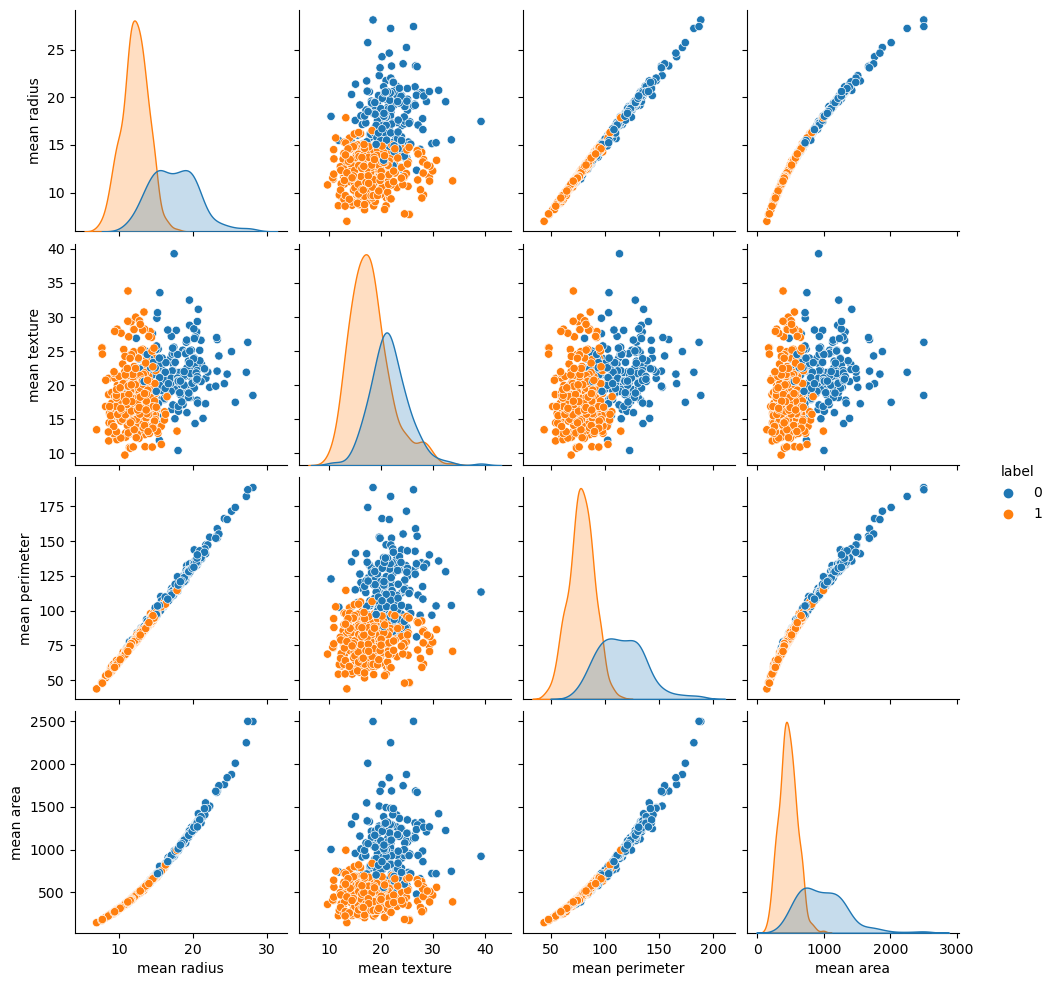

In [11]:
sns.pairplot(df,
             vars=['mean radius', 'mean texture', 'mean perimeter', 'mean area'],
            hue ='label')
plt.show()

### 특정 칼럼의 범위 확인 및 outlier 확인

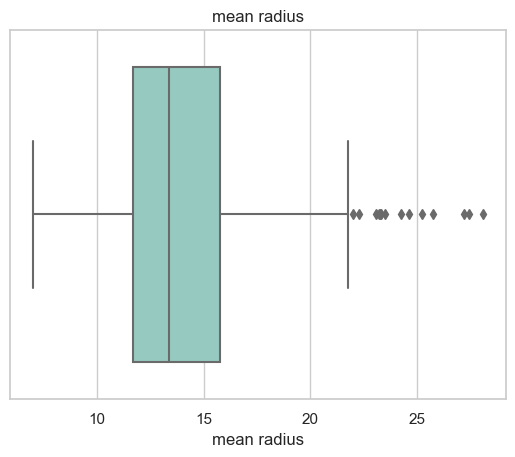

In [12]:
sns.set_theme(style="whitegrid")
sns.boxplot(x="mean radius", data=df, palette="Set3")
plt.title("mean radius")
plt.show()

### 각 컬럼별 히스토그램 확인

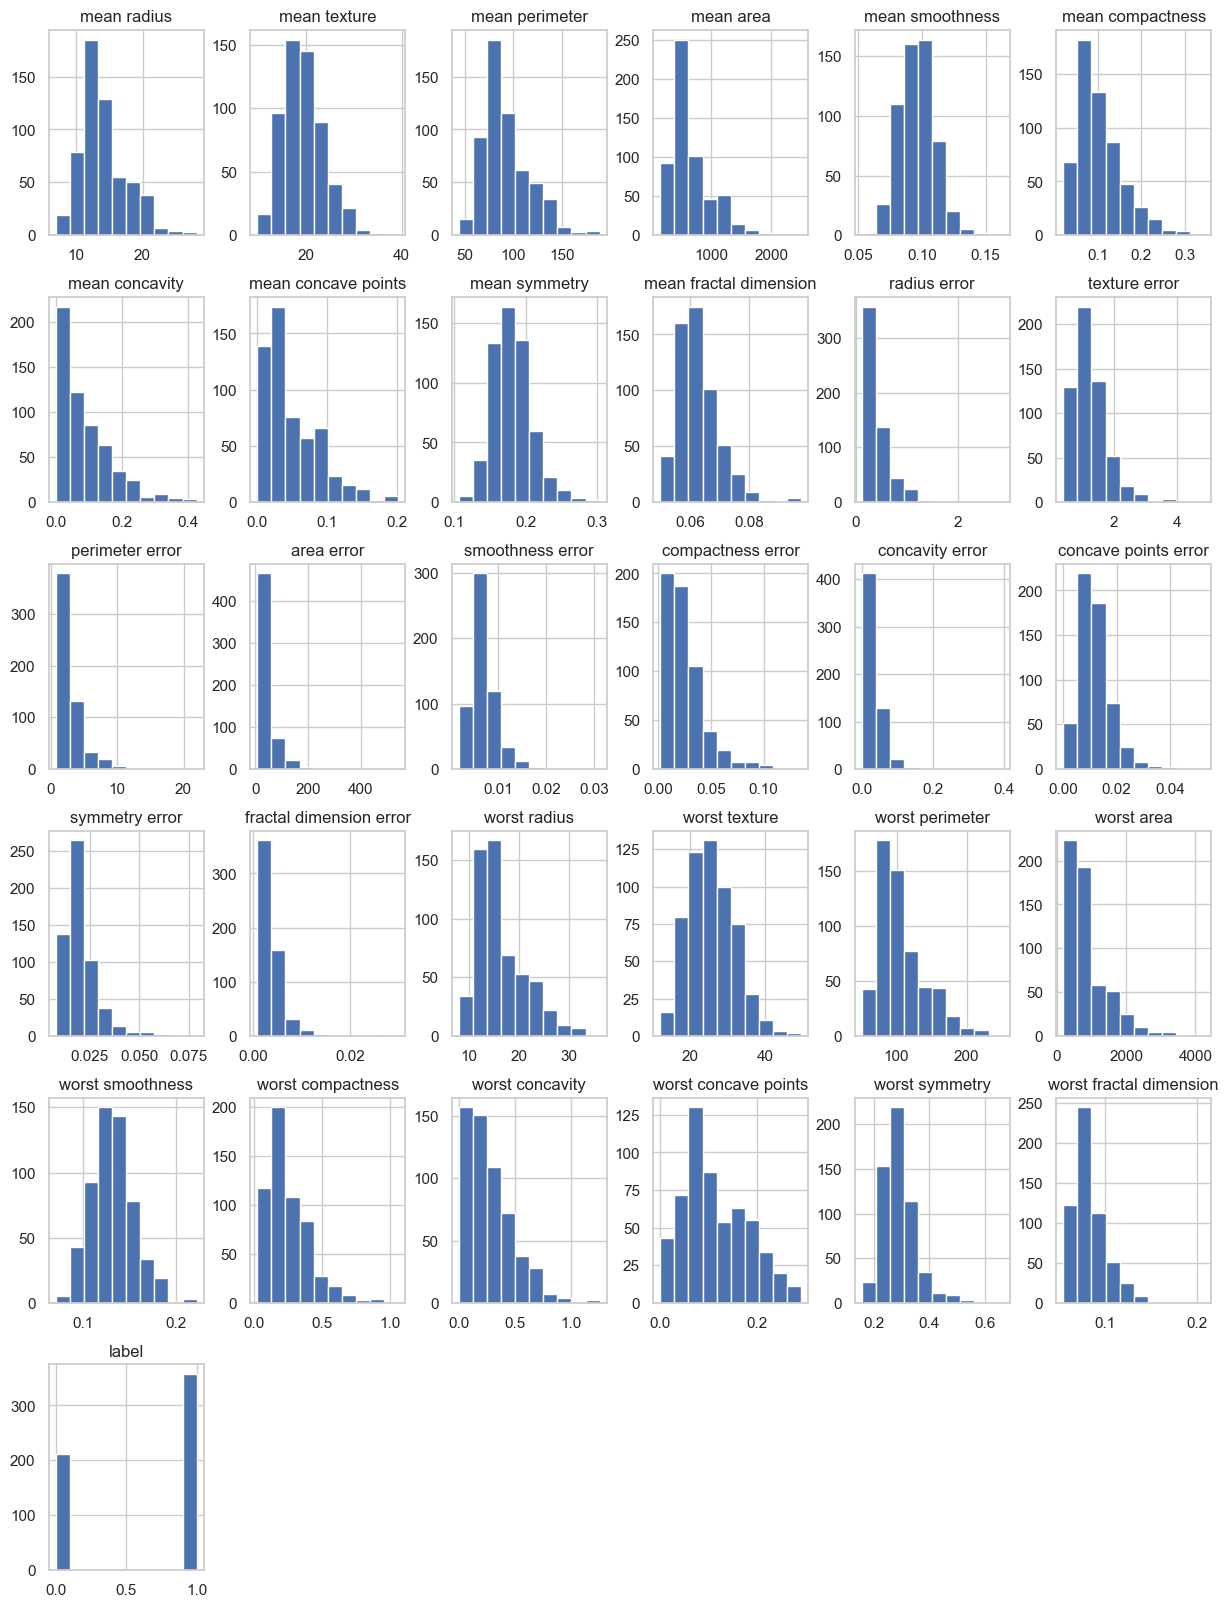

In [13]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df.hist(ax = ax)
plt.show()

### 독립변수와 종속변수 분리
데이터프레임 df에서 'label' 열을 제외한 모든 열을 변수 X에 할당하는 것을 의미  
label 열을 제외한 모든 특성(열)을 변수 X에 저장  
  
label 열은 보통 예측하려는 대상 또는 종속 변수  
label 열을 제외한 나머지 열들은 모델의 입력 변수 또는 독립 변수  
  
axis=1은 열 방향을 의미하며, label 열을 제외하기 위해 사용.  
X는 label 열을 제외한 모든 열을 포함하는 데이터프레임이 됨

In [14]:
X=df.drop('label',axis=1)
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### 종속변수 y
데이터프레임 df에서 label 열을 선택하여 변수 y에 할당하고 각 클래스별로 레이블의 빈도를 계산하는 것을 의미  
  
데이터프레임 df에서 'label' 열을 선택. 해당 열을 레이블로 추출하는 것  
  
추출된 label 열을 변수 y에 할당 y는 데이터프레임의 레이블이 됨.  

value_counts(): 레이블에 포함된 고유한 값의 빈도를 계산.  
  
데이터셋의 클래스 분포를 파악할 수 있음

In [15]:
y=df['label']
y.value_counts()

label
1    357
0    212
Name: count, dtype: int64

### ML_Classifiers 정확도

#### train, test / X, y 분류

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25,random_state=0)

In [ ]:
# Build a Logistic Regression classifier and predict

clf_lr = LogisticRegression(random_state=0)
clf_lr.fit(X_train, y_train)

pred_lr = clf_lr.predict(X_test)

print ("\n--- Logistic Regression Classifier ---")
print (accuracy_score(y_test, pred_lr))
print (confusion_matrix(y_test, pred_lr))

In [ ]:
# Build a Neural Network classifier and predict

clf_nn = MLPClassifier(random_state=0)
clf_nn.fit(X_train, y_train)

pred_nn = clf_nn.predict(X_test)

print ("\n--- Neural Network Classifier ---")
print (accuracy_score(y_test, pred_nn))
print (confusion_matrix(y_test, pred_nn))

In [ ]:
# Build a Decision Tree classifier and predict

clf_dt = DecisionTreeClassifier(random_state=0)
clf_dt.fit(X_train, y_train)

pred_dt = clf_dt.predict(X_test)

print ("\n--- Decision Tree Classifier ---")
print (accuracy_score(y_test, pred_dt))
print (confusion_matrix(y_test, pred_dt))

In [ ]:
# Build a RandomForest classifier and predict

clf_rf = RandomForestClassifier(random_state=0)
clf_rf.fit(X_train, y_train)

pred_rf = clf_rf.predict(X_test)

print ("\n--- Random Forest ---")
print (accuracy_score(y_test, pred_rf))
print (confusion_matrix(y_test, pred_rf))

## ML_Regression

### 라이브러리 불러오기

In [ ]:
# from sklearn.datasets import load_데이터 이름
from sklearn.datasets import load_digits
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets, metrics

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models

from sklearn.metrics import classification_report,confusion_matrix

### 데이터 불러오기

In [ ]:
df = pd.read_csv("C:/Users/yoojm/Gachon/2학년 1학기/인공지능개론_이명규/Dataset/boston.csv", index_col=0)

### 데이터 확인

In [ ]:
df

### 컬럼명 확인

In [ ]:
df.columns

In [ ]:
'''
| MedInc | 블록의 중간 소득 |
| HouseAge | 블록의 중간 주택 연도 |
| AveRooms | 주택 1가구당 평균 방의 수 |
| AveBedrms | 주택 1가구당 평균 침실의 수 |
| Population | 인구 |
| AveOccup |  average house occupancy 평균 주택점유율 |
| Latitude | 위도 |
| Longitude | 경도 |
'''

### 상관관계 행렬
0.3 이상인 경우 상관관계가 있고, 0.7이상이면 아주 높음  
히트맵을 그려서 판단

In [ ]:
df_corr=df.corr()
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

### 독립변수와 종속변수 분리
데이터프레임 df에서 'PRICE' 열을 제외한 모든 열을 변수 X에 할당하는 것을 의미  
label 열을 제외한 모든 특성(열)을 변수 X에 저장  
  
label 열은 보통 예측하려는 대상 또는 종속 변수  
label 열을 제외한 나머지 열들은 모델의 입력 변수 또는 독립 변수  
  
axis=1은 열 방향을 의미하며, label 열을 제외하기 위해 사용.  
X는 label 열을 제외한 모든 열을 포함하는 데이터프레임이 됨

In [ ]:
X = df.drop('PRICE',axis=1)
X.head()

### 종속변수 y
데이터프레임 df에서 PRICE 열을 선택하여 변수 y에 할당하고 각 클래스별로 레이블의 빈도를 계산하는 것을 의미  
  
데이터프레임 df에서 'PRICE' 열을 선택. 해당 열을 레이블로 추출하는 것  
  
추출된 label 열을 변수 y에 할당 y는 데이터프레임의 레이블이 됨.  

value_counts(): 레이블에 포함된 고유한 값의 빈도를 계산.  
  
데이터셋의 클래스 분포를 파악할 수 있음

In [ ]:
y = df['PRICE']
y.head()

### train, test / X, y

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25,random_state=0)

In [ ]:
# LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

ly_preds = model.predict(X_test)

print('평균제곱근오차', mean_squared_error(ly_preds, y_test))

In [ ]:
# 예측값과 실제 값 차이를 산접도로 표시, 노란색 예측

plt.figure(figsize=(10,5))
plt.scatter(X_test['MedInc'], y_test, label='y_test')
plt.scatter(X_test['MedInc'], ly_preds, c='red', label='ly_preds')
plt.show()

In [ ]:
# DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(X_train, y_train)

dy_preds = model.predict(X_test)

print('평균제곱근오차', mean_squared_error(dy_preds, y_test))

In [ ]:
# 예측값과 실제 값 차이를 산접도로 표시, 노란색 예측

plt.figure(figsize=(10,5))
plt.scatter(X_test['MedInc'], y_test, label='y_test')
plt.scatter(X_test['MedInc'], dy_preds, c='orange', label='dy_preds')
plt.show()

In [ ]:
# RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)

ry_preds = model.predict(X_test)

print('평균제곱근오차', mean_squared_error(ry_preds, y_test))

In [ ]:
# 예측값과 실제 값 차이를 산접도로 표시, 노란색 예측

plt.figure(figsize=(10,5))
plt.scatter(X_test['MedInc'], y_test, label='y_test')
plt.scatter(X_test['MedInc'], ry_preds, c='yellow', label='ry_preds')
plt.show()

In [ ]:
# SVM

model = SVR(kernel='linear')
model.fit(X_train, y_train)

sy_preds = model.predict(X_test)

print('평균제곱근오차', mean_squared_error(sy_preds, y_test))

In [ ]:
# 예측값과 실제 값 차이를 산접도로 표시, 노란색 예측

plt.figure(figsize=(10,5))
plt.scatter(X_test['MedInc'], y_test, label='y_test')
plt.scatter(X_test['MedInc'], sy_preds, c='green', label='sy_preds')
plt.show()

# DL

## DL_Classifier

### 라이브러리 불러오기

In [24]:
# from sklearn.datasets import load_데이터 이름
from sklearn.datasets import load_digits
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets, metrics

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models

from sklearn.metrics import classification_report,confusion_matrix

### 데이터 불러오기

In [25]:
df = pd.read_csv("C:/Users/yoojm/Gachon/2학년 1학기/인공지능개론_이명규/Dataset/breast_cancer.csv", index_col=0)

### 데이터 확인

In [26]:
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


### 컬럼명 확인

In [27]:
df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'label'],
      dtype='object')

### 레이블 갯수 확인 (그래프)

Text(0.5, 1.0, 'Label')

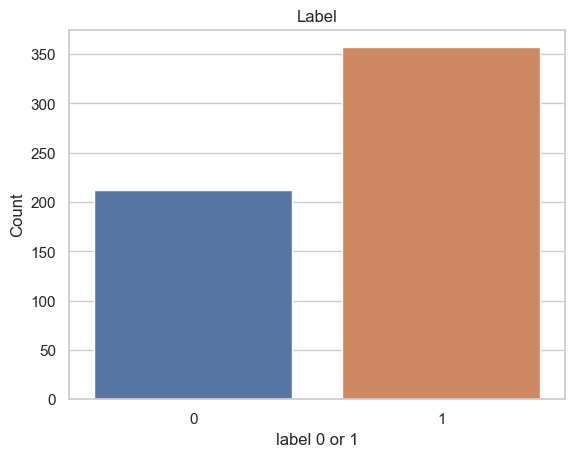

In [28]:
sns.countplot(data = df, x="label")
plt.xlabel("label 0 or 1")
plt.ylabel("Count")
plt.title("Label")

### 레이블 갯수 확인 (숫자)

In [29]:
df['label'].value_counts()

label
1    357
0    212
Name: count, dtype: int64

### 결측치 확인

In [31]:
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
label                      0
dtype: int64

### 결측치 제거

In [32]:
df = df.dropna()
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
label                      0
dtype: int64

### 컬럼별 히스토그램 확인

<Axes: xlabel='mean texture', ylabel='Density'>

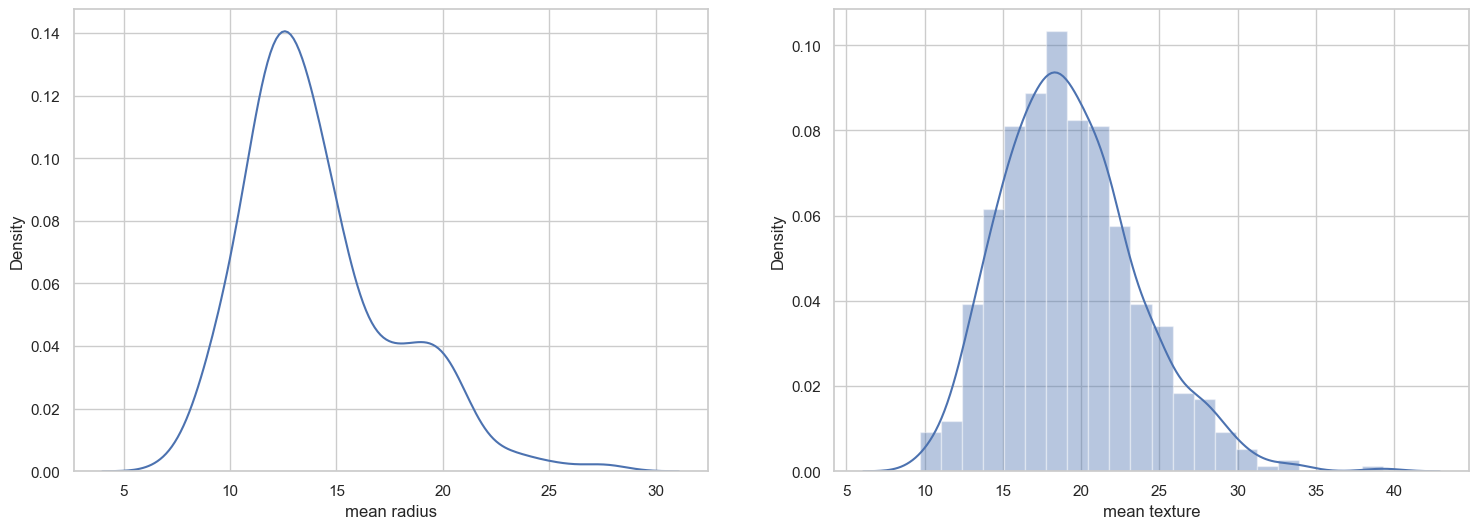

In [33]:
# 'mean radius'와'mean texture' 칼럼을 선택

figure = plt.figure(figsize=(18,6))
ax1 = plt.subplot(1,2,1)
sns.distplot(df['mean radius'], kde = True, hist = False, ax=ax1)
ax2 = plt.subplot(1,2,2)
sns.distplot(df['mean texture'], ax=ax2)

### 산점도 확인

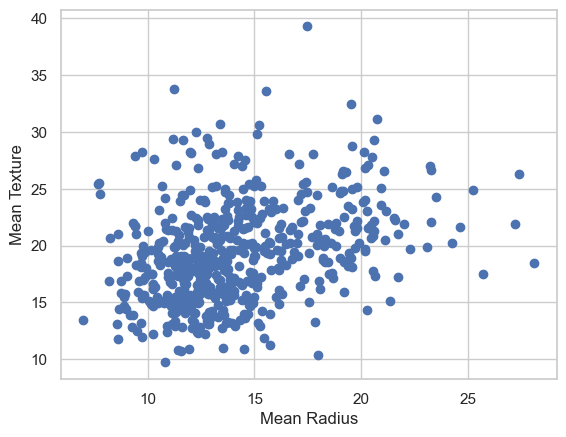

In [34]:
plt.scatter(df['mean radius'], df['mean texture'])
plt.xlabel('Mean Radius')
plt.ylabel('Mean Texture')

plt.show()

### pairplot를 사용해 각 상관관계 살펴보기
vars는 컬럼명, hue는 레이블 이름

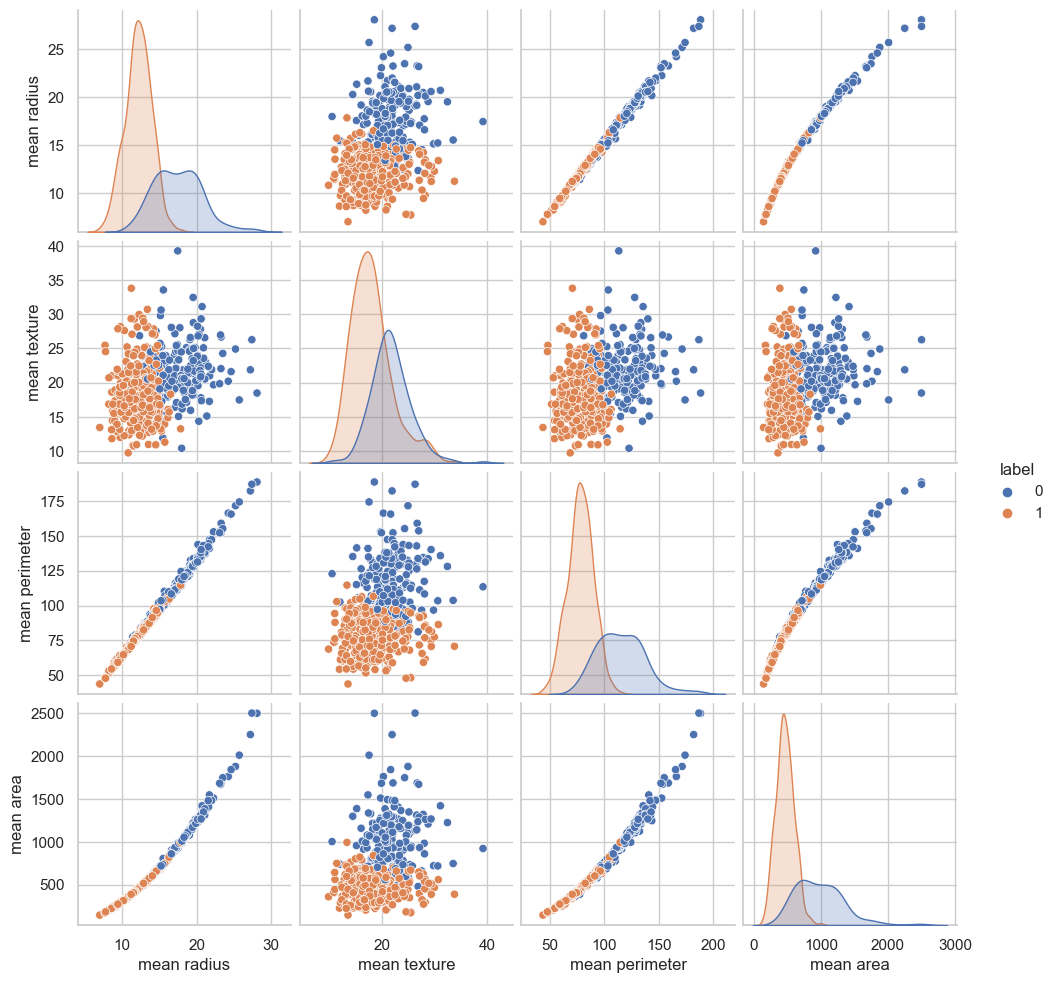

In [35]:
sns.pairplot(df,
             vars=['mean radius', 'mean texture', 'mean perimeter', 'mean area'],
            hue ='label')
plt.show()

### 특정 칼럼의 범위 확인 및 outlier 확인

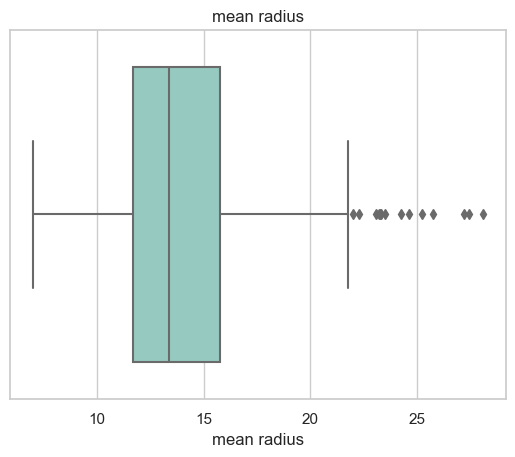

In [37]:
sns.set_theme(style="whitegrid")
sns.boxplot(x="mean radius", data=df, palette="Set3")
plt.title("mean radius")
plt.show()

### 각 칼럼별 히스토그램 확인

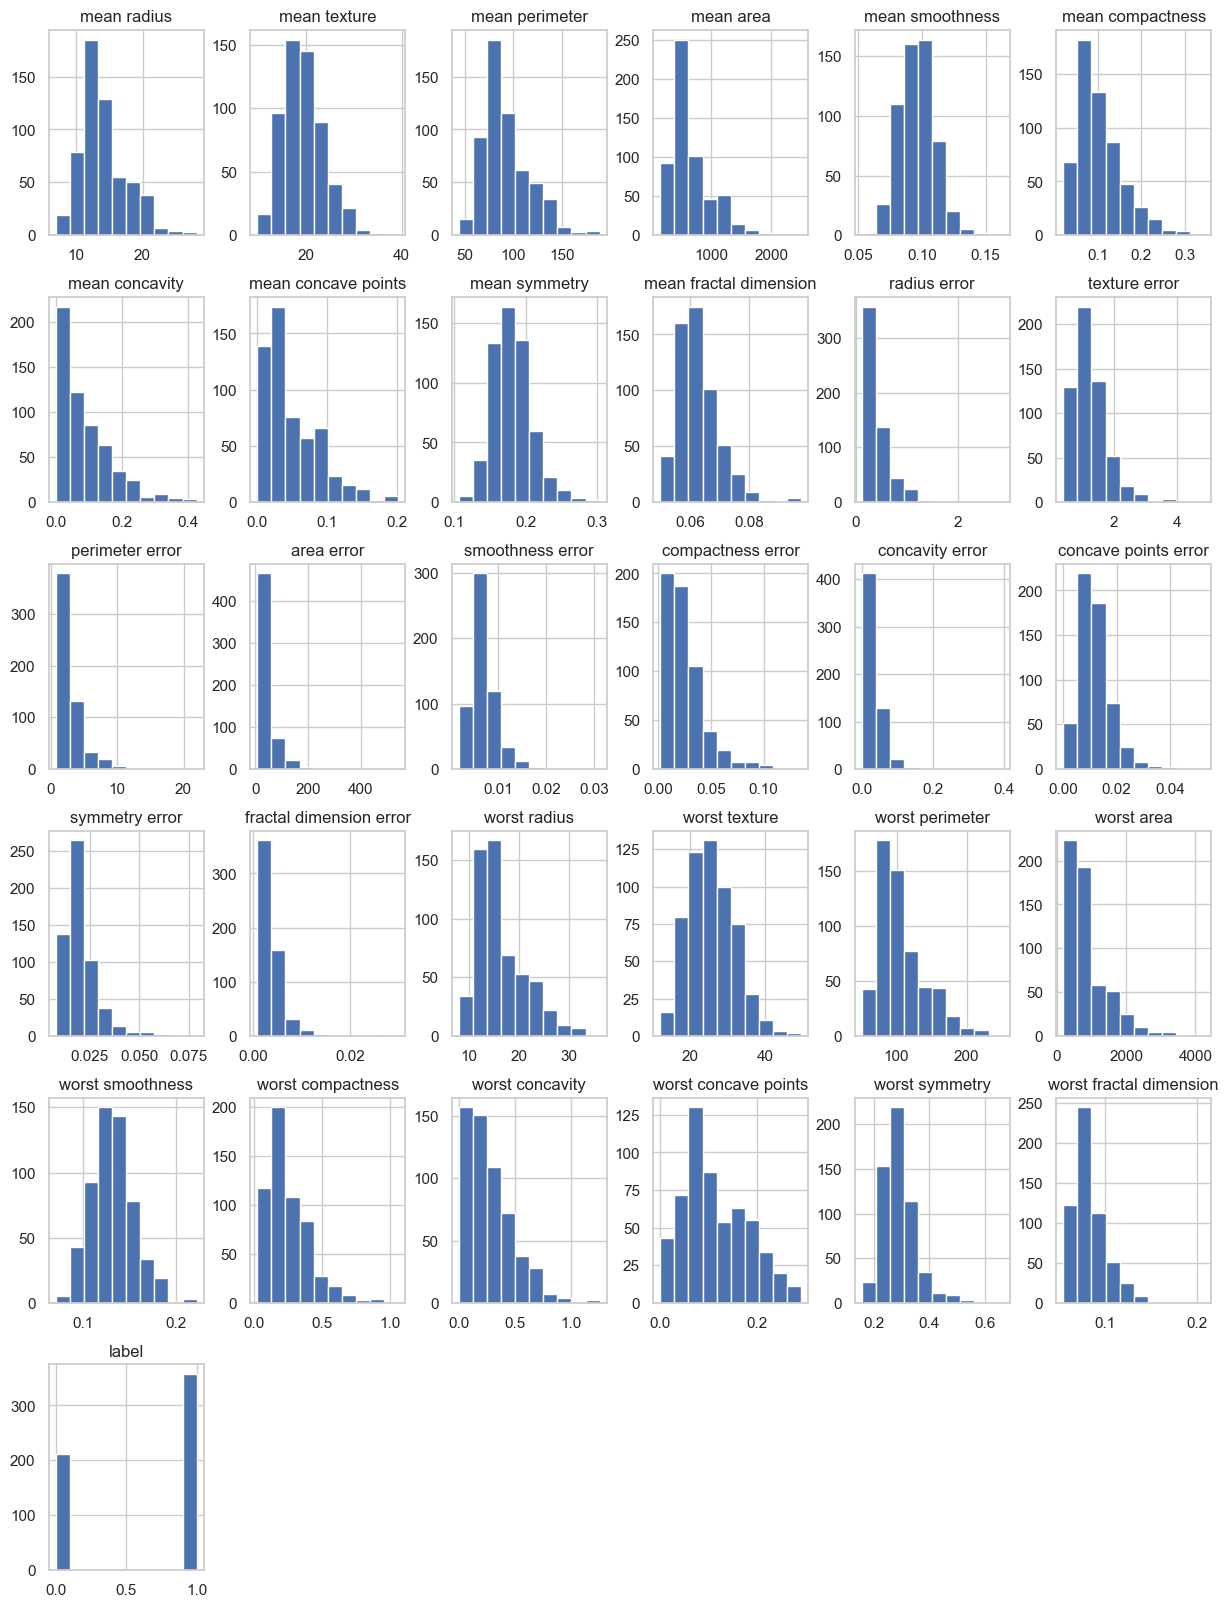

In [38]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df.hist(ax = ax)
plt.show()

### 독립변수와 종속변수 분리
데이터프레임 df에서 'PRICE' 열을 제외한 모든 열을 변수 X에 할당하는 것을 의미  
label 열을 제외한 모든 특성(열)을 변수 X에 저장  
  
label 열은 보통 예측하려는 대상 또는 종속 변수  
label 열을 제외한 나머지 열들은 모델의 입력 변수 또는 독립 변수  
  
axis=1은 열 방향을 의미하며, label 열을 제외하기 위해 사용.  
X는 label 열을 제외한 모든 열을 포함하는 데이터프레임이 됨

In [39]:
X=df.drop('label',axis=1)
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### 종속변수 y
데이터프레임 df에서 PRICE 열을 선택하여 변수 y에 할당하고 각 클래스별로 레이블의 빈도를 계산하는 것을 의미  
  
데이터프레임 df에서 'PRICE' 열을 선택. 해당 열을 레이블로 추출하는 것  
  
추출된 label 열을 변수 y에 할당 y는 데이터프레임의 레이블이 됨.  

value_counts(): 레이블에 포함된 고유한 값의 빈도를 계산.  
  
데이터셋의 클래스 분포를 파악할 수 있음

In [40]:
y=df['label']
y.value_counts()

label
1    357
0    212
Name: count, dtype: int64

In [41]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: label, dtype: int64

## 원-핫 인코딩

In [43]:
Y = pd.get_dummies(y).values

#### 딥러닝 입력을 위해 Numpy로 변환

In [44]:
X = X.values

In [47]:
X, y, Y
# 일반적으로 원-핫 인코딩은 0과 1의 숫자 값을 사용하지만,
# 특정 상황이나 설정에 따라 불리언 값(True/False)으로 표현될 수 있음.

(array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 0      0
 1      0
 2      0
 3      0
 4      0
       ..
 564    0
 565    0
 566    0
 567    0
 568    1
 Name: label, Length: 569, dtype: int64,
 array([[ True, False],
        [ True, False],
        [ True, False],
        ...,
        [ True, False],
        [ True, False],
        [False,  True]]))

### train, test / X, y
데이터를 나누고, shape 확인

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,)

In [50]:
X_train.shape, y_train.shape, X_test.shape, y_train.shape

((455, 30), (455, 2), (114, 30), (455, 2))

In [51]:
X_train.shape[1]

30

### 모델 학습

In [74]:
#모델 정의
model = Sequential()

model.add(Dense(20,input_shape=(X_train.shape[1],),activation='tanh'))
model.add(Dense(8,activation='tanh'))
model.add(Dense(6,activation='tanh'))
model.add(Dense(2,activation='sigmoid'))

model.compile(Adam(lr=0.04),'binary_crossentropy',metrics=['accuracy'])

model.summary()

# 모델 학습
model_history = model.fit(x=X_train, y=y_train, epochs=30, batch_size=32, validation_split=0.1)

# 모델 예측
y_pred = model.predict(X_test)

# 클래스 예측
y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_pred, axis=1)

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_26 (Dense)            (None, 20)                620       
                                                                 
 dense_27 (Dense)            (None, 8)                 168       
                                                                 
 dense_28 (Dense)            (None, 6)                 54        
                                                                 
 dense_29 (Dense)            (None, 2)                 14        
                                                                 
Total params: 856
Trainable params: 856
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
13/13 [==============================] - 1s 23ms/step - loss: 0.6703 - accuracy: 0.6406 - val_loss: 0.6907 - val_accuracy: 0.5435
Epoch 2/30
13/13 [=============================

### 그래프

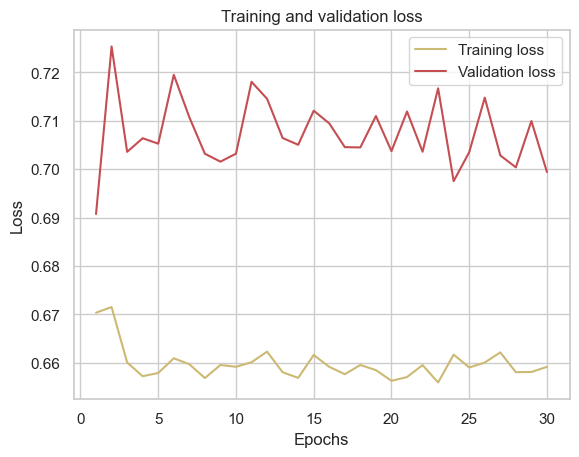

In [75]:
loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

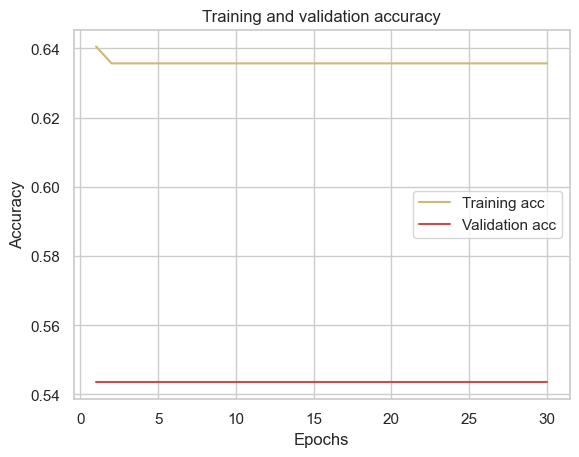

In [76]:
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### 정확성

In [77]:
#Accuracy of the predicted values

print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

InvalidParameterError: The 'y_true' parameter of classification_report must be an array-like or a sparse matrix. Got 1 instead.